In [1]:
# import all the required libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Dataset
df= pd.read_csv("loan.csv")
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
pd.set_option("display.max_columns",111)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,NaN,Jul-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
df.shape

(39717, 111)

In [7]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# Data Cleaning

we don't want a 'id' and 'member_id ' for prediction so firstly we remove them

In [8]:
df.drop(['id','member_id'],axis=1,inplace=True)

In [9]:
for i in df.columns:
    print(i,"=",df[i].isnull().sum())

loan_amnt = 0
funded_amnt = 0
funded_amnt_inv = 0
term = 0
int_rate = 0
installment = 0
grade = 0
sub_grade = 0
emp_title = 2459
emp_length = 1075
home_ownership = 0
annual_inc = 0
verification_status = 0
issue_d = 0
loan_status = 0
pymnt_plan = 0
url = 0
desc = 12940
purpose = 0
title = 11
zip_code = 0
addr_state = 0
dti = 0
delinq_2yrs = 0
earliest_cr_line = 0
inq_last_6mths = 0
mths_since_last_delinq = 25682
mths_since_last_record = 36931
open_acc = 0
pub_rec = 0
revol_bal = 0
revol_util = 50
total_acc = 0
initial_list_status = 0
out_prncp = 0
out_prncp_inv = 0
total_pymnt = 0
total_pymnt_inv = 0
total_rec_prncp = 0
total_rec_int = 0
total_rec_late_fee = 0
recoveries = 0
collection_recovery_fee = 0
last_pymnt_d = 71
last_pymnt_amnt = 0
next_pymnt_d = 38577
last_credit_pull_d = 2
collections_12_mths_ex_med = 56
mths_since_last_major_derog = 39717
policy_code = 0
application_type = 0
annual_inc_joint = 39717
dti_joint = 39717
verification_status_joint = 39717
acc_now_delinq = 0
tot_co

In [10]:
df.shape

(39717, 109)

In [11]:
for i in df.columns:
    print(i,"=",df[i].isnull().sum()/len(df)*100)

loan_amnt = 0.0
funded_amnt = 0.0
funded_amnt_inv = 0.0
term = 0.0
int_rate = 0.0
installment = 0.0
grade = 0.0
sub_grade = 0.0
emp_title = 6.191303472064859
emp_length = 2.7066495455346575
home_ownership = 0.0
annual_inc = 0.0
verification_status = 0.0
issue_d = 0.0
loan_status = 0.0
pymnt_plan = 0.0
url = 0.0
desc = 32.58050708764509
purpose = 0.0
title = 0.027695948838029054
zip_code = 0.0
addr_state = 0.0
dti = 0.0
delinq_2yrs = 0.0
earliest_cr_line = 0.0
inq_last_6mths = 0.0
mths_since_last_delinq = 64.66248709620565
mths_since_last_record = 92.98537150338646
open_acc = 0.0
pub_rec = 0.0
revol_bal = 0.0
revol_util = 0.12589067653649572
total_acc = 0.0
initial_list_status = 0.0
out_prncp = 0.0
out_prncp_inv = 0.0
total_pymnt = 0.0
total_pymnt_inv = 0.0
total_rec_prncp = 0.0
total_rec_int = 0.0
total_rec_late_fee = 0.0
recoveries = 0.0
collection_recovery_fee = 0.0
last_pymnt_d = 0.1787647606818239
last_pymnt_amnt = 0.0
next_pymnt_d = 97.12969257496789
last_credit_pull_d = 0.0050356

as we know that if null percentage of the column are between 4% to 40% we fill the null values and if the null values are under 4% then we drop rows of the columns and above 40% we drop those columns from datasets

In [12]:
null_per=df.isnull().sum()/len(df)*100
null_per

loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
int_rate                        0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 109, dtype: float64

In [13]:
columns_to_drop=null_per[null_per>40].index
columns_to_drop

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [14]:
df.drop(columns_to_drop,axis=1,inplace=True)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [15]:
df.isnull().sum()/len(df)*100

loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.000000
earliest_cr_line               0.000000


In [16]:
df["emp_title"].unique()

array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'FiSite Research',
       'Squarewave Solutions, Ltd.', 'Evergreen Center'], dtype=object)

In [17]:
df["emp_title"]=df["emp_title"].fillna("unkown")

In [18]:
df["emp_title"].isnull().sum()

0

In [19]:
df["desc"].unique()

array(['  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>',
       '  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>',
       nan, ...,
       'Our current gutter system on our home is old and in need of repair.    We will be using the borrowed funds to replace the gutter system on our home.',
       'The rate of interest and fees incurred by carrying a balance on my credit card are so outrageous at this point that continuing

In [20]:
df["desc"]=df["desc"].fillna("unkown")

In [21]:
df["desc"].isnull().sum()

0

In [22]:
df.dropna(inplace=True)

In [23]:
df.isnull().sum()/len(df)*100

loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_title                     0.0
emp_length                    0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
desc                          0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal                     0.0
revol_util    

In [24]:
df.reset_index(drop=True,inplace=True)

In [25]:
df.shape

(37823, 52)

In [26]:
df["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [27]:
df=df[df["loan_status"]!="Current"]

In [28]:
df.reset_index(drop=True,inplace=True)

In [29]:
df.shape

(36725, 52)

In [30]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,unkown,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,unkown,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,unkown,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,unkown,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


# Now Lets Understand the Data

1. loan_amnt: The requested loan amount.
2. funded_amnt: The actual amount funded for the loan.
3. funded_amnt_inv: The total amount committed by investors for the loan.
4. term: The duration of the loan in months.
5. int_rate: The interest rate on the loan.
6. installment: The monthly payment for the loan.
7. grade: The loan grade assigned by the lending institution.
8. sub_grade: The loan sub-grade assigned by the lending institution.
9. emp_title: The job title of the borrower.
10. emp_length: The length of employment of the borrower.
11. home_ownership: The type of home ownership (e.g., rent, mortgage, etc.).
12. annual_inc: The annual income of the borrower.
13. verification_status: Indicates if the borrower's income was verified by the lending institution.
14. issue_d: The date the loan was issued.
15. loan_status: The current status of the loan.
16. pymnt_plan: Indicates if a payment plan is in place. 
17. url: The URL of the loan listing. 
18. desc: A description provided by the borrower.
19. purpose: The purpose of the loan.
20. title: The loan title provided by the borrower. 
21. zip_code: The first 3 digits of the borrower's zip code. 
22. addr_state: The state of the borrower's address. 
23. dti: The borrower's debt-to-income ratio.
24. delinq_2yrs: The number of 30+ days past-due incidences of delinquency in the borrower's credit history within the past 2 years. 
25. earliest_cr_line: The date when the borrower's earliest reported credit line was opened. 
26. inq_last_6mths: The number of inquiries made by creditors in the last 6 months.
27. open_acc: The number of open credit lines in the borrower's credit profile.
28. pub_rec: The number of derogatory public records on the borrower's credit report.
29. revol_bal: The borrower's revolving balance (credit card debt). 
30. revol_util: The borrower's revolving line utilization rate (percentage of available credit used). 
31. total_acc: The total number of credit lines in the borrower's credit profile. 
32. initial_list_status: The initial listing status of the loan. 
33. out_prncp: The remaining outstanding principal amount of the loan. 
34. out_prncp_inv: The remaining outstanding principal amount, as a percentage of the initial investment. 
35. total_pymnt: The total amount received to date for the loan.
36. total_pymnt_inv: The total amount received to date, as a percentage of the initial investment. 
37. total_rec_prncp: The total principal received to date.
38. total_rec_int: The total interest received to date.
39. total_rec_late_fee: The total late fees received to date.
40. recoveries: The post charge-off gross recovery amount. 
41. collection_recovery_fee: The post charge-off collection fee.
42. last_pymnt_d: The date of the last payment received. 
43. last_pymnt_amnt: The last total payment amount received.
44. last_credit_pull_d: The most recent month lenders pulled credit for the borrower.
45. Number of collections in 12 months excluding medical collections.
46. Policy Code: Policy-as-code is the use of code to define and manage rules and conditions.
47. application_type: type of policy.
48. acc_now_delinq: The number of accounts on which the borrower is now delinquent.
49. chargeoff_within_12_mths: Number of charge-offs within 12 months
50. pub_rec_bankruptcies: Number of public record bankruptcies
51. tax_liens: Number of tax liens

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36725 entries, 0 to 36724
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   36725 non-null  int64  
 1   funded_amnt                 36725 non-null  int64  
 2   funded_amnt_inv             36725 non-null  float64
 3   term                        36725 non-null  object 
 4   int_rate                    36725 non-null  object 
 5   installment                 36725 non-null  float64
 6   grade                       36725 non-null  object 
 7   sub_grade                   36725 non-null  object 
 8   emp_title                   36725 non-null  object 
 9   emp_length                  36725 non-null  object 
 10  home_ownership              36725 non-null  object 
 11  annual_inc                  36725 non-null  float64
 12  verification_status         36725 non-null  object 
 13  issue_d                     367

This dataset have 37823 rows and 52 columns in which 18 are float ,11 are int ,and 23 are object and memory usage:14.0+MB

In [32]:
df.describe(include="all")

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,36725.000000,36725.000000,36725.000000,36725,36725,36725.000000,36725,36725,36725,36725,36725,3.672500e+04,36725,36725,36725,36725,36725,36725,36725,36725,36725,36725,36725.000000,36725.000000,36725,36725.000000,36725.000000,36725.000000,36725.000000,36725,36725.000000,36725,36725.0,36725.0,36725.000000,36725.000000,36725.000000,36725.000000,36725.000000,36725.000000,36725.000000,36725,36725.000000,36725,36725.0,36725.0,36725,36725.0,36725.0,36725.0,36725.000000,36725.0
unique,NaN,NaN,NaN,2,335,NaN,7,35,27413,11,4,NaN,3,51,2,1,36725,24451,14,18375,807,48,NaN,NaN,513,NaN,NaN,NaN,NaN,1086,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97,NaN,97,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,36 months,10.99%,NaN,B,A4,unkown,10+ years,RENT,NaN,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,unkown,debt_consolidation,Debt Consolidation,100xx,CA,NaN,NaN,Oct-99,NaN,NaN,NaN,NaN,0%,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mar-13,NaN,May-16,NaN,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,27489,891,NaN,11133,2762,1360,8358,17616,NaN,15515,1993,31524,36725,1,12049,17341,2028,549,6659,NaN,NaN,352,NaN,NaN,NaN,NaN,881,NaN,36725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999,NaN,8985,NaN,NaN,36725,NaN,NaN,NaN,NaN,NaN
mean,11153.877468,10884.822328,10445.510279,NaN,NaN,325.015602,NaN,NaN,NaN,NaN,NaN,6.947365e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.337712,0.146004,NaN,0.868836,9.305895,0.054050,13387.249666,NaN,22.163812,NaN,0.0,0.0,12020.919525,11545.616178,9767.379203,2154.796903,1.341245,97.402261,12.499825,NaN,2800.682096,NaN,0.0,1.0,NaN,0.0,0.0,0.0,0.041688,0.0
std,7368.415278,7107.569767,7008.229251,NaN,NaN,208.852576,NaN,NaN,NaN,NaN,NaN,6.407095e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.649386,0.491434,NaN,1.067604,4.375713,0.235326,15857.681365,NaN,11.406991,NaN,0.0,0.0,8849.661919,8705.560499,7034.393197,2411.987791,7.205249,700.534611,150.315606,NaN,4538.188113,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.200558,0.0
min,500.000000,500.000000,0.000000,NaN,NaN,16.080000,NaN,NaN,NaN,NaN,NaN,4.000000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,2.000000,0.000000,0.000000,NaN,2.000000,NaN,0.0,0.0,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,NaN,0.010000,NaN,0.0,1.0,NaN,0.0,0.0,0.0,0.000000,0.0
25%,5500.000000,5425.000000,5000.000000,NaN,NaN,167.730000,NaN,NaN,NaN,NaN,NaN,4.123500e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.220000,0.000000,NaN,0.000000,6.000000,0.000000,3735.000000,NaN,14.000000,NaN,0.0,0.0,5590.586144,5292.960000,4641.430000,660.780000,0.000000,0.000000,0.000000,NaN,223.600000,NaN,0.0,1.0,NaN,0.0,0.0,0.0,0.000000,0.0
50%,10000.000000,9600.000000,9000.000000,NaN,NaN,280.410000,NaN,NaN,NaN,NaN,NaN,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.430000,0.000000,NaN,1.000000,9.000000,0.000000,8883.000000,NaN,20.000000,NaN,0.0,0.0,9833.880000,9376.390000,8000.000000,1328.680000,0.000000,0.000000,0.000000,NaN,592.400000,NaN,0.0,1.0,NaN,0.0,0.0,0.0,0.000000,0.0
75%,15000.000000,15000.000000,14356.026830,NaN,NaN,429.450000,NaN,NaN,NaN,NaN,NaN,8.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.590000,0.000000,NaN,1.000000,12.000000,0.000000,17040.000000,NaN,29.000000,NaN,0.0,0.0,16322.907190,15638.330000,13500.000000,2720.740000,0.000000,0.000000,0.000000,NaN,3554.940000,NaN,0.0,1.0,NaN,0

from observation we see that there are 4 columns (last_pymnt_d,issue_d,last_credit_pull_d,earliest_cr_line) having date but their are in object datatype so, let's convert them into datetime

In [33]:
df[['last_pymnt_d','issue_d','last_credit_pull_d','earliest_cr_line']]

,last_pymnt_d,issue_d,last_credit_pull_d,earliest_cr_line
0,Jan-15,Dec-11,May-16,Jan-85
1,Apr-13,Dec-11,Sep-13,Apr-99
2,Jun-14,Dec-11,May-16,Nov-01
3,Jan-15,Dec-11,Apr-16,Feb-96
4,Jan-15,Dec-11,Jan-16,Nov-04
...,...,...,...,...
36720,May-08,Dec-07,Oct-15,Oct-79
36721,Feb-10,Dec-07,May-14,Dec-00
36722,Aug-08,Nov-07,Aug-08,Mar-00
36723,May-10,Nov-07,Apr-16,Feb-89


In [34]:
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format="%b-%y")

In [35]:
df["issue_d"]= pd.to_datetime(df["issue_d"],format='%b-%y')

In [36]:
df["last_credit_pull_d"]=pd.to_datetime(df["last_credit_pull_d"],format="%b-%y")

In [37]:
df["earliest_cr_line"]=pd.to_datetime(df["earliest_cr_line"],format="%b-%y")

In [38]:
df[['last_pymnt_d','issue_d','last_credit_pull_d','earliest_cr_line']]

,last_pymnt_d,issue_d,last_credit_pull_d,earliest_cr_line
0,2015-01-01,2011-12-01,2016-05-01,1985-01-01
1,2013-04-01,2011-12-01,2013-09-01,1999-04-01
2,2014-06-01,2011-12-01,2016-05-01,2001-11-01
3,2015-01-01,2011-12-01,2016-04-01,1996-02-01
4,2015-01-01,2011-12-01,2016-01-01,2004-11-01
...,...,...,...,...
36720,2008-05-01,2007-12-01,2015-10-01,1979-10-01
36721,2010-02-01,2007-12-01,2014-05-01,2000-12-01
36722,2008-08-01,2007-11-01,2008-08-01,2000-03-01
36723,2010-05-01,2007-11-01,2016-04-01,1989-02-01


In [39]:
df['revol_util'] = df['revol_util'].str.rstrip('%').astype(float)

In [40]:
df.rename(columns={'revol_util': 'revol_util_per'}, inplace=True)

In [41]:
df['int_rate'] = df['int_rate'].str.rstrip('%').astype(float)

In [42]:
df.rename(columns={'int_rate': 'int_rate_per'}, inplace=True)

In [43]:
df['zip_code']=df['zip_code'].str.rstrip('x').astype(int)

In [44]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_per,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util_per,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,unkown,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,unkown,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,unkown,small_business,real estate business,606,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,unkown,wedding,My wedding loan I promise to pay back,852,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36725 entries, 0 to 36724
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   loan_amnt                   36725 non-null  int64         
 1   funded_amnt                 36725 non-null  int64         
 2   funded_amnt_inv             36725 non-null  float64       
 3   term                        36725 non-null  object        
 4   int_rate_per                36725 non-null  float64       
 5   installment                 36725 non-null  float64       
 6   grade                       36725 non-null  object        
 7   sub_grade                   36725 non-null  object        
 8   emp_title                   36725 non-null  object        
 9   emp_length                  36725 non-null  object        
 10  home_ownership              36725 non-null  object        
 11  annual_inc                  36725 non-null  float64   

<AxesSubplot:xlabel='loan_status', ylabel='count'>

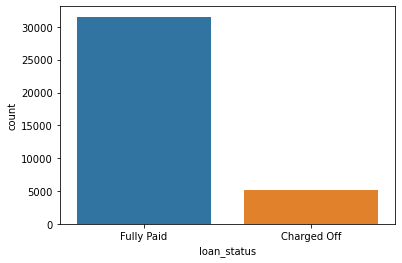

In [46]:
# Target Frequency

sns.countplot(df["loan_status"])

by seeing above chart we can say that, target variable is imbalanced

# Min, Max or Average requested loan amount

In [47]:
print("maximum loan amount :", df["loan_amnt"].max()) 
print("minimum loan amount :" ,df["loan_amnt"].min())
print("average loan amount :" ,df["loan_amnt"].mean())

maximum loan amount : 35000
minimum loan amount : 500
average loan amount : 11153.87746766508


<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

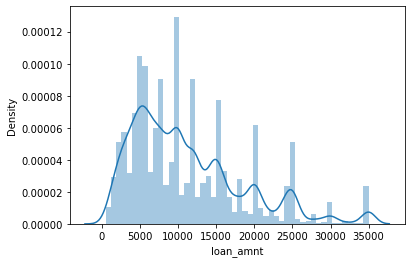

In [48]:
sns.distplot(df["loan_amnt"],kde=True)

<AxesSubplot:xlabel='term', ylabel='loan_amnt'>

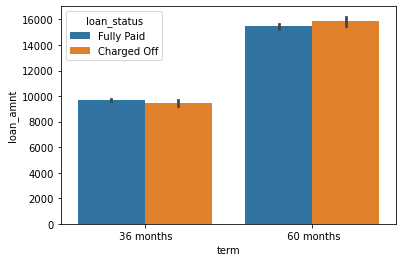

In [49]:
sns.barplot(x=df["term"],y=df["loan_amnt"],hue=df["loan_status"])

# Min, Max or Average of the actual amount funded for the loan.

In [50]:
print("maximum funded amount :"  ,df["funded_amnt"].max())
print("minimum funded amount :"  ,df["funded_amnt"].min())
print("average funded amount :" ,df["funded_amnt"].mean())

maximum funded amount : 35000
minimum funded amount : 500
average funded amount : 10884.822328114364


<AxesSubplot:xlabel='term', ylabel='funded_amnt'>

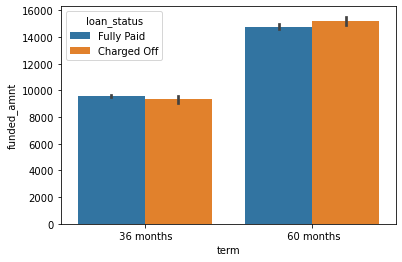

In [51]:
sns.barplot(x=df["term"],y=df["funded_amnt"],hue=df["loan_status"])

<AxesSubplot:xlabel='funded_amnt', ylabel='Density'>

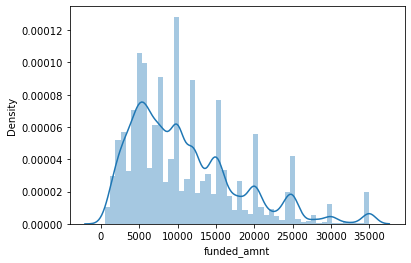

In [52]:
sns.distplot(df["funded_amnt"],kde=True)

# Min, Max, Average of the total amount committed by investors for the loan.

In [53]:
print("minimum funded amount by investor :", df["funded_amnt_inv"].min())
print("maximum funded amount by investor :", df["funded_amnt_inv"].max())
print("average funded amount by investor :", df["funded_amnt_inv"].mean())

minimum funded amount by investor : 0.0
maximum funded amount by investor : 35000.0
average funded amount by investor : 10445.510278626576


<AxesSubplot:xlabel='term', ylabel='funded_amnt_inv'>

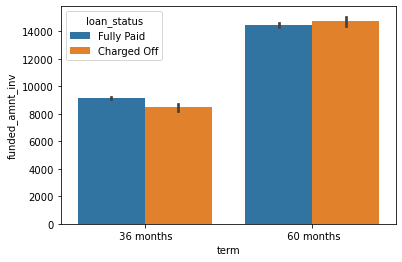

In [54]:
sns.barplot(x=df["term"],y=df["funded_amnt_inv"],hue=df["loan_status"])

<AxesSubplot:xlabel='funded_amnt_inv', ylabel='Count'>

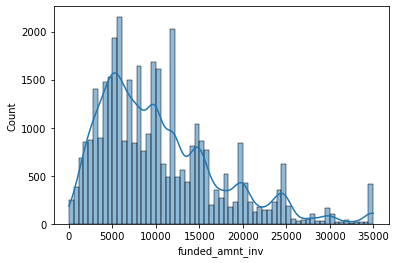

In [55]:
sns.histplot(df["funded_amnt_inv"],kde=True)

# Distribution of Loan Term in Months.

In [56]:
df["term"].value_counts()

 36 months    27489
 60 months     9236
Name: term, dtype: int64

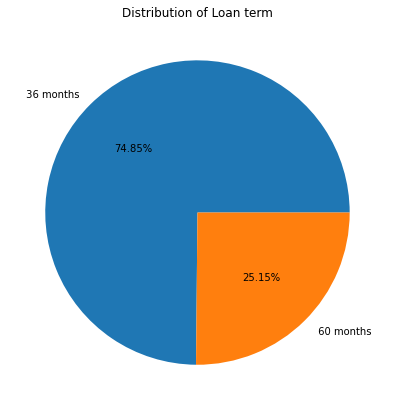

In [57]:
plt.figure(figsize=(7,7))
plt.pie(df["term"].value_counts(),labels=df["term"].value_counts().index,autopct="%5.2f%%")
plt.title("Distribution of Loan term")
plt.show()

around 74.9% loans has 36 months of loan term

and 25.1% loans has 60 months of loan term

In [58]:
df["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [59]:
print("The Average loan amount by 36 term = ", df[df["term"]==' 36 months']["loan_amnt"].mean())

The Average loan amount by 36 term =  9671.415839062898


In [60]:
print("The Average loan amount by 60 term = ",df[df["term"]==' 60 months']["loan_amnt"].mean())

The Average loan amount by 60 term =  15566.110870506713


In [61]:
print("The Minimum Rate of intrest by 36 term =",df[df["term"]==' 36 months']["int_rate_per"].min())

The Minimum Rate of intrest by 36 term = 5.42


In [62]:
print("The Maximum Rate of intrest by 36 term =",df[df["term"]==' 36 months']["int_rate_per"].max())

The Maximum Rate of intrest by 36 term = 23.22


In [63]:
print("The Average Rate of intrest by 36 term =",df[df["term"]==' 36 months']["int_rate_per"].mean())

The Average Rate of intrest by 36 term = 11.034278074867304


In [64]:
print("The Minimum Rate of intrest by 60 term =",df[df["term"]==' 60 months']["int_rate_per"].min())

The Minimum Rate of intrest by 60 term = 5.79


In [65]:
print("The Maximum Rate of intrest by 60 term =",df[df["term"]==' 60 months']["int_rate_per"].max())

The Maximum Rate of intrest by 60 term = 24.4


In [66]:
print("The Average Rate of intrest by 60 term =",df[df["term"]==' 60 months']["int_rate_per"].mean())

The Average Rate of intrest by 60 term = 14.794763967085101


# Min,Max,Average interest rate on the loan.

In [67]:
print("minimum loan intrest:" ,df["int_rate_per"].min())
print("maximum loan intrest:" ,df["int_rate_per"].max())
print("average loan intrest:" ,df["int_rate_per"].mean())

minimum loan intrest: 5.42
maximum loan intrest: 24.4
average loan intrest: 11.98000571817535


<AxesSubplot:xlabel='int_rate_per', ylabel='Count'>

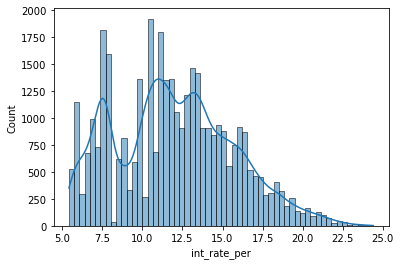

In [68]:
sns.histplot(df["int_rate_per"],kde=True)

<AxesSubplot:xlabel='term', ylabel='int_rate_per'>

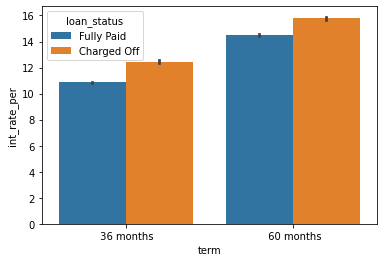

In [69]:
sns.barplot(x=df["term"],y=df["int_rate_per"],hue=df["loan_status"])

# what is avg max and min annual income of the loaner

In [70]:
avg=df['annual_inc'].mean()
print('The average annual income is:',avg)

The average annual income is: 69473.64828264125


In [71]:
ma=df['annual_inc'].max()
print('The maximum annual income is:',ma)

The maximum annual income is: 6000000.0


In [72]:
mi=df['annual_inc'].min()
print('The minimum annual income is:',mi)

The minimum annual income is: 4000.0


# Distribution of home ownership

In [73]:
df["home_ownership"].value_counts()

RENT        17616
MORTGAGE    16316
OWN          2697
OTHER          96
Name: home_ownership, dtype: int64

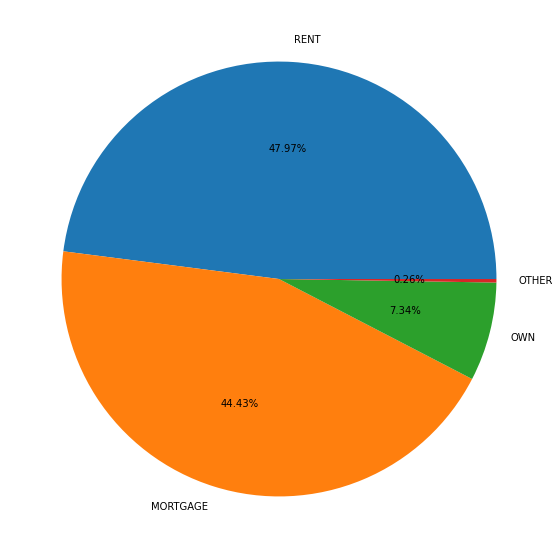

In [74]:
plt.figure(figsize=(10,10))
plt.pie(df["home_ownership"].value_counts(),labels=df["home_ownership"].value_counts().index,autopct="%2.2f%%")
plt.show()

from this data we knew that 48% are live on rent which maximum rate
and 44.4% are live on mortage and 7.3 % has own house

# how many employee has 10 + years of experience

In [75]:
year=df[df['emp_length']>'10+ years']
len(year)

25306

25306 employees are had 10 + years of experience

zip_code: The first 3 digits of the borrower's zip code.

# The Maximum loan borrower zip code

In [76]:
df["zip_code"].unique().max()

999

the zip code no 999 is the highest loan borrower zip code.

#  The purpose of the loan.

In [77]:
df["purpose"].value_counts()

debt_consolidation    17341
credit_card            4796
other                  3586
home_improvement       2731
major_purchase         2049
small_business         1647
car                    1429
wedding                 887
medical                 645
moving                  541
house                   347
vacation                341
educational             292
renewable_energy         93
Name: purpose, dtype: int64

the maximum loan taken for the purpose of debt_consolidation and minimum loan taken for renewable_energy

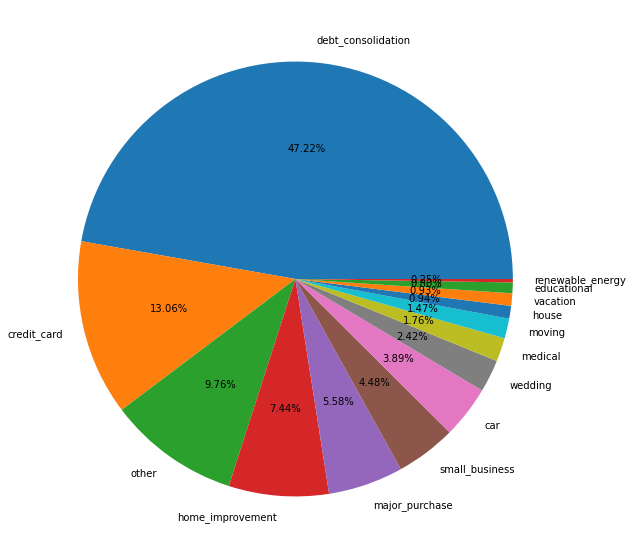

In [78]:
plt.figure(figsize=(10,10))
plt.pie(df["purpose"].value_counts(),labels=df["purpose"].value_counts().index,autopct="%2.2f%%")
plt.show()

# The borrower's debt-to-income ratio

In [79]:
print("maximum debt-to-income ratio :",df["dti"].max())

maximum debt-to-income ratio : 29.99


In [80]:
print("minimum debt-to-income ratio :",df["dti"].min())

minimum debt-to-income ratio : 0.0


In [81]:
print("average debt-to-income ratio :",df["dti"].mean())

average debt-to-income ratio : 13.337712185159985


<AxesSubplot:xlabel='dti', ylabel='Density'>

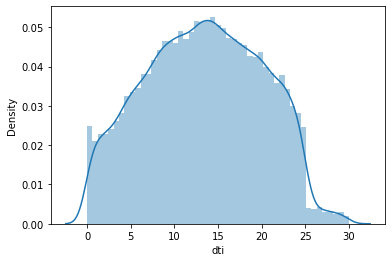

In [82]:
sns.distplot(df["dti"],kde=True)

# verification_status Indicates if the borrower's income was verified by the lending institution.

In [83]:
df["verification_status"].value_counts()

Not Verified       15515
Verified           11744
Source Verified     9466
Name: verification_status, dtype: int64

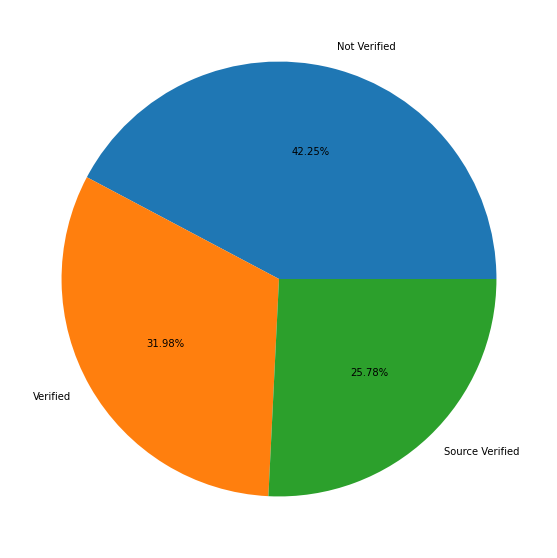

In [84]:
plt.figure(figsize=(10,10))
plt.pie(df["verification_status"].value_counts(),labels=df["verification_status"].value_counts().index,autopct="%2.2f%%")
plt.show()

# Now let's separate categorical,numerical and datetime columns.

In [85]:
catcol=df.select_dtypes(object)
catcol

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,url,desc,purpose,title,addr_state,initial_list_status,application_type
0,36 months,B,B2,unkown,10+ years,RENT,Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,AZ,f,INDIVIDUAL
1,60 months,C,C4,Ryder,< 1 year,RENT,Source Verified,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,GA,f,INDIVIDUAL
2,36 months,C,C5,unkown,10+ years,RENT,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,unkown,small_business,real estate business,IL,f,INDIVIDUAL
3,36 months,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,CA,f,INDIVIDUAL
4,36 months,A,A4,Veolia Transportaton,3 years,RENT,Source Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,unkown,wedding,My wedding loan I promise to pay back,AZ,f,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36720,36 months,B,B2,Bank of America Corp.,6 years,MORTGAGE,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,To paydown credit cards at a more favorable rate.,credit_card,Debt Consolidation,IL,f,INDIVIDUAL
36721,36 months,C,C3,Fullmoon Software,2 years,RENT,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,"Simply looking to pay off credit cards, consol...",debt_consolidation,no credit cards for me,VA,f,INDIVIDUAL
36722,36 months,C,C1,E.E. Wine Inc,1 year,RENT,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Need loan to pay off high intrest credit cards...,debt_consolidation,Want to pay off high intrest cards,VA,f,INDIVIDUAL
36723,36 months,C,C2,unkown,3 years,MORTGAGE,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,I want to pay off 3 of my credit cards with hi...,debt_consolidation,Taking the First Step by Consolidating,AZ,f,INDIVIDUAL


In [86]:
numcol=df.select_dtypes([int,float])
numcol

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate_per,installment,annual_inc,zip_code,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util_per,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,10.65,162.87,24000.00,860,27.65,0,1,3,0,13648,83.7,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.0,1,0,0.0,0,0.0,0.0
1,2500,2500,2500.0,15.27,59.83,30000.00,309,1.00,0,5,3,0,1687,9.4,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,1,0,0.0,0,0.0,0.0
2,2400,2400,2400.0,15.96,84.33,12252.00,606,8.72,0,2,2,0,2956,98.5,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.0,1,0,0.0,0,0.0,0.0
3,10000,10000,10000.0,13.49,339.31,49200.00,917,20.00,0,1,10,0,5598,21.0,37,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0,1,0,0.0,0,0.0,0.0
4,5000,5000,5000.0,7.90,156.46,36000.00,852,11.20,0,3,9,0,7963,28.3,12,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,0.0,1,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36720,12000,12000,725.0,9.01,381.66,100671.39,604,6.64,0,0,16,1,7606,18.6,39,0.0,0.0,12347.219880,745.98,12000.00,347.22,0.00,0.00,0.00,11202.55,0.0,1,0,0.0,0,1.0,0.0
36721,12375,12375,1000.0,10.91,404.62,80000.00,201,9.23,0,0,4,1,13126,96.5,4,0.0,0.0,14370.922250,1161.29,12375.00,1995.92,0.00,0.00,0.00,4259.11,0.0,1,0,0.0,0,1.0,0.0
36722,4800,4800,1100.0,10.28,155.52,35000.00,226,7.51,0,0,11,1,5836,68.7,12,0.0,0.0,5134.085288,1176.56,4800.00,334.09,0.00,0.00,0.00,3891.08,0.0,1,0,0.0,0,1.0,0.0
36723,7000,7000,1000.0,10.59,227.82,63500.00,853,8.50,0,1,9,1,14930,79.0,21,0.0,0.0,8174.021910,1167.72,7000.00,1174.02,0.00,0.00,0.00,1571.29,0.0,1,0,0.0,0,1.0,0.0


In [87]:
datetime=df.select_dtypes(include=["datetime64[ns]"])
datetime

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
0,2011-12-01,1985-01-01,2015-01-01,2016-05-01
1,2011-12-01,1999-04-01,2013-04-01,2013-09-01
2,2011-12-01,2001-11-01,2014-06-01,2016-05-01
3,2011-12-01,1996-02-01,2015-01-01,2016-04-01
4,2011-12-01,2004-11-01,2015-01-01,2016-01-01
...,...,...,...,...
36720,2007-12-01,1979-10-01,2008-05-01,2015-10-01
36721,2007-12-01,2000-12-01,2010-02-01,2014-05-01
36722,2007-11-01,2000-03-01,2008-08-01,2008-08-01
36723,2007-11-01,1989-02-01,2010-05-01,2016-04-01


# Encoding : 

Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be
fitted by machine learning models which only take numerical data.

In [88]:
from sklearn.preprocessing import LabelEncoder

In [89]:
le=LabelEncoder()
for i in catcol:
    catcol[i]=le.fit_transform(catcol[i])
    print(i,"=",le.classes_)

term = [' 36 months' ' 60 months']
grade = ['A' 'B' 'C' 'D' 'E' 'F' 'G']
sub_grade = ['A1' 'A2' 'A3' 'A4' 'A5' 'B1' 'B2' 'B3' 'B4' 'B5' 'C1' 'C2' 'C3' 'C4'
 'C5' 'D1' 'D2' 'D3' 'D4' 'D5' 'E1' 'E2' 'E3' 'E4' 'E5' 'F1' 'F2' 'F3'
 'F4' 'F5' 'G1' 'G2' 'G3' 'G4' 'G5']
emp_title = ['  old palm inc' ' Brocade Communications' ' CenturyLink' ...
 'zion lutheran school' 'zoll medical corp' 'zozaya officiating']
emp_length = ['1 year' '10+ years' '2 years' '3 years' '4 years' '5 years' '6 years'
 '7 years' '8 years' '9 years' '< 1 year']
home_ownership = ['MORTGAGE' 'OTHER' 'OWN' 'RENT']
verification_status = ['Not Verified' 'Source Verified' 'Verified']
loan_status = ['Charged Off' 'Fully Paid']
pymnt_plan = ['n']
url = ['https://lendingclub.com/browse/loanDetail.action?loan_id=1000030'
 'https://lendingclub.com/browse/loanDetail.action?loan_id=1000033'
 'https://lendingclub.com/browse/loanDetail.action?loan_id=1000045' ...
 'https://lendingclub.com/browse/loanDetail.action?loan_id=999955'
 'htt

In [90]:
df=pd.concat([catcol,numcol,datetime],axis=1)
df.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,url,desc,purpose,title,addr_state,initial_list_status,application_type,loan_amnt,funded_amnt,funded_amnt_inv,int_rate_per,installment,annual_inc,zip_code,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util_per,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
0,0,1,6,27178,1,3,2,1,0,3884,18608,1,2803,3,0,0,5000,5000,4975.0,10.65,162.87,24000.0,860,27.65,0,1,3,0,13648,83.7,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.0,1,0,0.0,0,0.0,0.0,2011-12-01,1985-01-01,2015-01-01,2016-05-01
1,1,2,13,18091,10,3,1,0,0,3883,18609,0,15263,10,0,0,2500,2500,2500.0,15.27,59.83,30000.0,309,1.00,0,5,3,0,1687,9.4,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,1,0,0.0,0,0.0,0.0,2011-12-01,1999-04-01,2013-04-01,2013-09-01
2,0,2,14,27178,1,3,0,1,0,3882,24422,11,17710,14,0,0,2400,2400,2400.0,15.96,84.33,12252.0,606,8.72,0,2,2,0,2956,98.5,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.0,1,0,0.0,0,0.0,0.0,2011-12-01,2001-11-01,2014-06-01,2016-05-01
3,0,2,10,317,1,3,1,1,0,3881,18564,9,17611,4,0,0,10000,10000,10000.0,13.49,339.31,49200.0,917,20.00,0,1,10,0,5598,21.0,37,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0,1,0,0.0,0,0.0,0.0,2011-12-01,1996-02-01,2015-01-01,2016-04-01
4,0,0,3,22911,3,3,1,1,0,3880,24422,13,10085,3,0,0,5000,5000,5000.0,7.90,156.46,36000.0,852,11.20,0,3,9,0,7963,28.3,12,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,0.0,1,0,0.0,0,0.0,0.0,2011-12-01,2004-11-01,2015-01-01,2016-01-01


In [91]:
df.corr()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,url,desc,purpose,title,addr_state,initial_list_status,application_type,loan_amnt,funded_amnt,funded_amnt_inv,int_rate_per,installment,annual_inc,zip_code,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util_per,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
term,1.000000,0.434142,0.445501,-0.003363,-0.029281,-0.100083,0.240824,-0.179821,NaN,0.178414,-0.056028,-0.035136,-0.013211,0.009071,NaN,NaN,0.347099,0.325099,0.336136,0.440832,0.088298,0.044160,-0.013147,0.075291,0.008621,0.049523,0.046223,0.011412,0.067205,0.065057,0.093687,NaN,NaN,0.305496,0.313994,0.198985,0.507317,0.017478,0.114249,0.038554,0.269729,NaN,NaN,NaN,NaN,NaN,0.017514,NaN
grade,0.434142,1.000000,0.979452,0.006958,-0.007674,0.054863,0.193716,-0.202060,NaN,-0.006626,-0.018511,-0.005608,-0.009033,-0.003305,NaN,NaN,0.285535,0.286813,0.269533,0.950599,0.260631,0.050921,0.009515,0.094902,0.161550,0.116713,0.012412,0.093872,0.093132,0.442884,-0.036811,NaN,NaN,0.279045,0.264538,0.161492,0.516118,0.105632,0.125371,0.072324,0.155795,NaN,NaN,NaN,NaN,NaN,0.078205,NaN
sub_grade,0.445501,0.979452,1.000000,0.005148,-0.006984,0.056743,0.201100,-0.206385,NaN,-0.011639,-0.021539,-0.006486,-0.011092,-0.001685,NaN,NaN,0.297682,0.297630,0.280113,0.963314,0.269614,0.052174,0.009087,0.099884,0.162736,0.124216,0.014880,0.097130,0.099960,0.452147,-0.036355,NaN,NaN,0.288633,0.273842,0.169678,0.526507,0.106101,0.128513,0.073976,0.160849,NaN,NaN,NaN,NaN,NaN,0.080454,NaN
emp_title,-0.003363,0.006958,0.005148,1.000000,-0.008132,0.003835,-0.008443,-0.030968,NaN,-0.004264,0.001946,0.035036,0.155911,0.006027,NaN,NaN,-0.019616,-0.018614,-0.015953,0.009907,-0.017241,-0.020976,-0.000046,-0.014573,0.009163,0.016733,-0.035900,0.017940,-0.028187,-0.022886,-0.024394,NaN,NaN,-0.025619,-0.022861,-0.028296,-0.012915,0.015137,0.004804,0.008156,-0.024231,NaN,NaN,NaN,NaN,NaN,0.012809,NaN
emp_length,-0.029281,-0.007674,-0.006984,-0.008132,1.000000,0.074507,-0.027075,0.007828,NaN,-0.019425,0.000668,0.007280,-0.023258,-0.006782,NaN,NaN,-0.053420,-0.052833,-0.051998,-0.008959,-0.046108,-0.045318,0.005490,-0.016956,-0.019606,0.000923,-0.038446,-0.013698,-0.058734,0.000808,-0.074051,NaN,NaN,-0.047074,-0.046318,-0.044095,-0.042236,0.007753,-0.006548,-0.000828,-0.027382,NaN,NaN,NaN,NaN,NaN,-0.016548,NaN
home_ownership,-0.100083,0.054863,0.056743,0.003835,0.074507,1.000000,-0.076729,-0.020374,NaN,-0.072119,-0.006223,0.026731,-0.012508,-0.043209,NaN,NaN,-0.170302,-0.164856,-0.161123,0.068383,-0.134152,-0.196035,-0.009483,0.027441,-0.018458,-0.084086,-0.205525,-0.031950,-0.214820,0.081098,-0.330066,NaN,NaN,-0.152184,-0.150047,-0.152837,-0.106822,0.022865,-0.020222,-0.008895,-0.109277,NaN,NaN,NaN,NaN,NaN,-0.034654,NaN
verification_status,0.240824,0.193716,0.201100,-0.008443,-0.027075,-0.076729,1.000000,-0.052502,NaN,0.117239,0.037761,-0.030670,-0.038456,-0.011527,NaN,NaN,0.417049,0.410682,0.407088,0.200746,0.366392,0.129870,0.007653,0.063301,0.007940,0.016679,0.086219,-0.015715,0.151826,0.057575,0.116202,NaN,NaN,0.372807,0.369935,0.344526,0.341793,0.014020,0.073068,0.032688,0.213951,NaN,NaN,NaN,NaN,NaN,-0.011871,NaN
loan_status,-0.179821,-0.202060,-0.206385,-0.030968,0.007828,-0.020374,-0.052502,1.000000,NaN,-0.007098,-0.007556,-0.039509,-0.047603,0.021250,NaN,NaN,-0.062819,-0.059538,-0.046128,-0.213520,-0.028202,0.038399,-0.016339,-0.043840,-0.016787,-0.068046,0.003979,-0.049411,-0.008690,-0.100581,0.018287,NaN,NaN,0.230641,0.229099,0.330935,-0.018994,-0.168455,-0.342312,-0.204731,0.220947,NaN,NaN,NaN,NaN,NaN,-0.044851,NaN
pymnt_plan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# Now lets Seperate dataframe in independent variable and dependent variable

In [92]:
X=df[['grade','sub_grade','emp_title','home_ownership','verification_status','purpose','title','addr_state','loan_amnt','funded_amnt','funded_amnt_inv',
      'int_rate_per','installment','annual_inc','revol_bal','revol_util_per','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp',
      'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt']]

In [93]:
y=df["loan_status"]

In [94]:
X

,grade,sub_grade,emp_title,home_ownership,verification_status,purpose,title,addr_state,loan_amnt,funded_amnt,funded_amnt_inv,int_rate_per,installment,annual_inc,revol_bal,revol_util_per,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,1,6,27178,3,2,1,2803,3,5000,5000,4975.0,10.65,162.87,24000.00,13648,83.7,0.0,0.0,5863.155187,5833.84,5000.00,0.00,0.00,0.00,171.62
1,2,13,18091,3,1,0,15263,10,2500,2500,2500.0,15.27,59.83,30000.00,1687,9.4,0.0,0.0,1008.710000,1008.71,456.46,0.00,117.08,1.11,119.66
2,2,14,27178,3,0,11,17710,14,2400,2400,2400.0,15.96,84.33,12252.00,2956,98.5,0.0,0.0,3005.666844,3005.67,2400.00,0.00,0.00,0.00,649.91
3,2,10,317,3,1,9,17611,4,10000,10000,10000.0,13.49,339.31,49200.00,5598,21.0,0.0,0.0,12231.890000,12231.89,10000.00,16.97,0.00,0.00,357.48
4,0,3,22911,3,1,13,10085,3,5000,5000,5000.0,7.90,156.46,36000.00,7963,28.3,0.0,0.0,5632.210000,5632.21,5000.00,0.00,0.00,0.00,161.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36720,1,6,2245,0,0,1,4288,14,12000,12000,725.0,9.01,381.66,100671.39,7606,18.6,0.0,0.0,12347.219880,745.98,12000.00,0.00,0.00,0.00,11202.55
36721,2,12,8513,3,0,2,17266,42,12375,12375,1000.0,10.91,404.62,80000.00,13126,96.5,0.0,0.0,14370.922250,1161.29,12375.00,0.00,0.00,0.00,4259.11
36722,2,10,6870,3,0,2,14698,42,4800,4800,1100.0,10.28,155.52,35000.00,5836,68.7,0.0,0.0,5134.085288,1176.56,4800.00,0.00,0.00,0.00,3891.08
36723,2,11,27178,0,0,2,13901,3,7000,7000,1000.0,10.59,227.82,63500.00,14930,79.0,0.0,0.0,8174.021910,1167.72,7000.00,0.00,0.00,0.00,1571.29


In [95]:
y

0        1
1        0
2        1
3        1
4        1
        ..
36720    1
36721    1
36722    1
36723    1
36724    0
Name: loan_status, Length: 36725, dtype: int32

# Split the data into train data and test data

In [96]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)
print("Shape of X_train =",X_train.shape)
print("Shape of y_train =",y_train.shape)
print("Shape of X_test =",X_test.shape)
print("Shape of y_test =",y_test.shape)

Shape of X_train = (25707, 25)
Shape of y_train = (25707,)
Shape of X_test = (11018, 25)
Shape of y_test = (11018,)


# Scaling

In [97]:
from sklearn.preprocessing import StandardScaler
se = StandardScaler()

X_train=se.fit_transform(X_train)
X_test=se.fit_transform(X_test)

# 1.Model Building  KNeighbors

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [99]:
knn=KNeighborsClassifier(n_neighbors=4)

In [100]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [101]:
y_test_pred=knn.predict(X_test)

In [102]:
y

0        1
1        0
2        1
3        1
4        1
        ..
36720    1
36721    1
36722    1
36723    1
36724    0
Name: loan_status, Length: 36725, dtype: int32

In [103]:
f1=f1_score(y_test,y_test_pred)

In [104]:
f1

0.9562745503411205

# Cross Validation

In [105]:
from sklearn.model_selection import cross_val_score

In [106]:
knn = KNeighborsClassifier()

In [107]:
scores = cross_val_score(knn, X, y, cv=5)

In [108]:
print("Cross-Validation Scores:", scores)

Cross-Validation Scores: [0.9470388  0.93914227 0.94091219 0.93219877 0.92743363]


In [109]:
mean_score = scores.mean()
print("Mean Score:", mean_score)

Mean Score: 0.9373451327433628


# 2.logictics regression

In [110]:
X

,grade,sub_grade,emp_title,home_ownership,verification_status,purpose,title,addr_state,loan_amnt,funded_amnt,funded_amnt_inv,int_rate_per,installment,annual_inc,revol_bal,revol_util_per,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,1,6,27178,3,2,1,2803,3,5000,5000,4975.0,10.65,162.87,24000.00,13648,83.7,0.0,0.0,5863.155187,5833.84,5000.00,0.00,0.00,0.00,171.62
1,2,13,18091,3,1,0,15263,10,2500,2500,2500.0,15.27,59.83,30000.00,1687,9.4,0.0,0.0,1008.710000,1008.71,456.46,0.00,117.08,1.11,119.66
2,2,14,27178,3,0,11,17710,14,2400,2400,2400.0,15.96,84.33,12252.00,2956,98.5,0.0,0.0,3005.666844,3005.67,2400.00,0.00,0.00,0.00,649.91
3,2,10,317,3,1,9,17611,4,10000,10000,10000.0,13.49,339.31,49200.00,5598,21.0,0.0,0.0,12231.890000,12231.89,10000.00,16.97,0.00,0.00,357.48
4,0,3,22911,3,1,13,10085,3,5000,5000,5000.0,7.90,156.46,36000.00,7963,28.3,0.0,0.0,5632.210000,5632.21,5000.00,0.00,0.00,0.00,161.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36720,1,6,2245,0,0,1,4288,14,12000,12000,725.0,9.01,381.66,100671.39,7606,18.6,0.0,0.0,12347.219880,745.98,12000.00,0.00,0.00,0.00,11202.55
36721,2,12,8513,3,0,2,17266,42,12375,12375,1000.0,10.91,404.62,80000.00,13126,96.5,0.0,0.0,14370.922250,1161.29,12375.00,0.00,0.00,0.00,4259.11
36722,2,10,6870,3,0,2,14698,42,4800,4800,1100.0,10.28,155.52,35000.00,5836,68.7,0.0,0.0,5134.085288,1176.56,4800.00,0.00,0.00,0.00,3891.08
36723,2,11,27178,0,0,2,13901,3,7000,7000,1000.0,10.59,227.82,63500.00,14930,79.0,0.0,0.0,8174.021910,1167.72,7000.00,0.00,0.00,0.00,1571.29


In [111]:
y

0        1
1        0
2        1
3        1
4        1
        ..
36720    1
36721    1
36722    1
36723    1
36724    0
Name: loan_status, Length: 36725, dtype: int32

In [112]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [113]:
y_test_pred=lg.predict(X_test)

In [114]:
f1=f1_score(y_test,y_test_pred)

In [115]:
f1

0.9955312549287629

# hyperparameter

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
param={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40],'max_iter':[100,200,300,400]}

In [118]:
classifier_regressor=GridSearchCV(lg,param_grid=param,scoring='accuracy',cv=5)

In [119]:
classifier_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40],
                         'max_iter': [100, 200, 300, 400],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [120]:
classifier_regressor.best_params_

{'C': 40, 'max_iter': 100, 'penalty': 'l2'}

In [121]:
classifier_regressor.best_score_

0.9982106389016814

# prediction

In [122]:
y_test_pred1=classifier_regressor.predict(X_test)

In [123]:
from sklearn.metrics import classification_report,accuracy_score,recall_score,precision_score,confusion_matrix

In [124]:
score=f1_score(y_test,y_test_pred1)
score

0.9986816431999156

In [125]:
print(classification_report(y_test,y_test_pred1))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1549
           1       1.00      1.00      1.00      9469

    accuracy                           1.00     11018
   macro avg       1.00      0.99      1.00     11018
weighted avg       1.00      1.00      1.00     11018



# cross vaildation

In [126]:
from sklearn.model_selection import cross_val_score

In [127]:
scores=cross_val_score(classifier_regressor,X,y,cv=5)

In [128]:
print('cross vaildation:',scores)

cross vaildation: [1.         1.         0.99836624 0.99959156 0.99945541]


In [129]:
mean_score = scores.mean()
print("Mean Score:", mean_score)

Mean Score: 0.9994826412525528


# 3.XGBoost

In [130]:
import xgboost as xgb

In [131]:
data_matrix=xgb.DMatrix(data=X,label=y)

In [132]:
from xgboost import XGBClassifier

In [133]:
params={
    "max_depth":4,
    "alpha":10,
    "learning_rate":1.0,
    "n_estimators":100
}

In [134]:
xgb_clf=XGBClassifier(**params)

In [135]:
xgb_clf.fit(X_train,y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [136]:
y_train_pred=xgb_clf.predict(X_train)
y_test_pred=xgb_clf.predict(X_test)

In [137]:
print("Train Data")
confusion_matrix(y_train,y_train_pred)

Train Data


array([[ 3588,    64],
       [    1, 22054]], dtype=int64)

In [138]:
print("Test Data")
confusion_matrix(y_test,y_test_pred)

Test Data


array([[1512,   37],
       [ 283, 9186]], dtype=int64)

In [139]:
print("Train Data")
print(accuracy_score(y_train,y_train_pred))
print("Test Data")
print(accuracy_score(y_test,y_test_pred))


Train Data
0.9974715058155367
Test Data
0.970956616445816


In [140]:
print("Train Data")
print(classification_report(y_train,y_train_pred))
print("Test Data")
print(classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3652
           1       1.00      1.00      1.00     22055

    accuracy                           1.00     25707
   macro avg       1.00      0.99      0.99     25707
weighted avg       1.00      1.00      1.00     25707

Test Data
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1549
           1       1.00      0.97      0.98      9469

    accuracy                           0.97     11018
   macro avg       0.92      0.97      0.94     11018
weighted avg       0.97      0.97      0.97     11018



In [141]:
from xgboost import cv

In [142]:
params={
    "max_depth":4,
    "alpha":10,
    "learning_rate":1.0,
   
}

xgb_cv=cv(dtrain=data_matrix,params=params,nfold=3,early_stopping_rounds=10,metrics="auc")

In [143]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.965254,0.003395,0.962899,0.004817
1,0.987338,0.000759,0.985663,0.001145
2,0.995252,0.000404,0.993236,0.001341
3,0.996988,0.000348,0.995049,0.001281
4,0.997688,0.000320,0.996061,0.000688


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

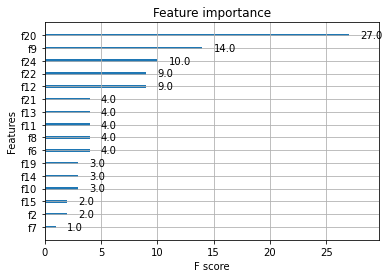

In [144]:
xgb.plot_importance(xgb_clf)

# 4.SVM

In [145]:
from sklearn.svm import SVC

In [146]:
svc=SVC(kernel="linear")
svc.fit(X_train,y_train)
y_pred_train=svc.predict(X_train)
y_pred_test=svc.predict(X_test)

In [147]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score,precision_score

In [148]:
print("Train Data")
confusion_matrix(y_train,y_pred_train)

Train Data


array([[ 3593,    59],
       [    0, 22055]], dtype=int64)

In [149]:
print("Test Data")
confusion_matrix(y_test,y_pred_test)

Test Data


array([[1515,   34],
       [   0, 9469]], dtype=int64)

In [150]:
print("Train Data")
print(accuracy_score(y_train,y_pred_train))
print("Test Data")
print(accuracy_score(y_test,y_pred_test))

Train Data
0.9977049052787179
Test Data
0.9969141404973679


In [151]:
print("Train Data")
print(classification_report(y_train,y_pred_train))
print("Test Data")
print(classification_report(y_test,y_pred_test))

Train Data
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3652
           1       1.00      1.00      1.00     22055

    accuracy                           1.00     25707
   macro avg       1.00      0.99      1.00     25707
weighted avg       1.00      1.00      1.00     25707

Test Data
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1549
           1       1.00      1.00      1.00      9469

    accuracy                           1.00     11018
   macro avg       1.00      0.99      0.99     11018
weighted avg       1.00      1.00      1.00     11018



# 5 Decision Tree 

In [152]:
from sklearn.tree import DecisionTreeClassifier

In [153]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_train_pred=dt.predict(X_train)
y_test_pred=dt.predict(X_test)

In [154]:
from sklearn.metrics import classification_report
print("Train Data")
print(classification_report(y_train,y_train_pred))

print("Test Data")
print(classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3652
           1       1.00      1.00      1.00     22055

    accuracy                           1.00     25707
   macro avg       1.00      1.00      1.00     25707
weighted avg       1.00      1.00      1.00     25707

Test Data
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1549
           1       0.99      0.97      0.98      9469

    accuracy                           0.97     11018
   macro avg       0.92      0.96      0.94     11018
weighted avg       0.97      0.97      0.97     11018



In [155]:
from sklearn.tree import plot_tree

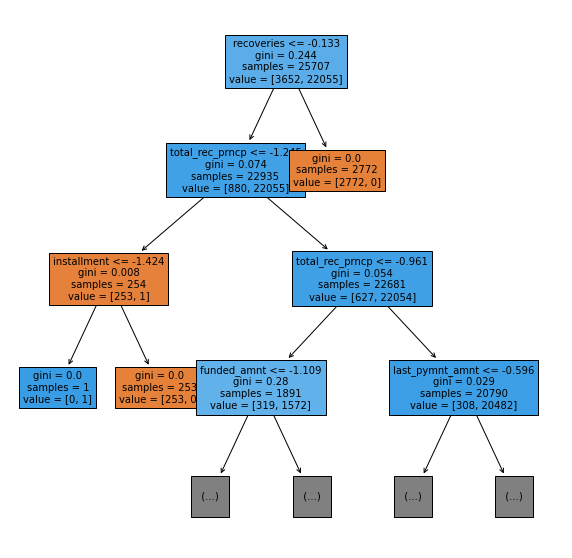

In [156]:
fig,ax=plt.subplots(figsize=(10,10))
chart=plot_tree(dt,max_depth=3,feature_names=X.columns,filled=True,fontsize=10)

In [157]:
param_grid={
    "criterion":['gini','entropy'],
    "max_depth":np.arange(3,51,3),
    "min_samples_leaf":[3,6,9,12,15,18]
}

In [158]:
from sklearn.model_selection import GridSearchCV
model=GridSearchCV(dt,param_grid=param_grid,scoring="f1_macro",cv=5,n_jobs=-1)

In [159]:
model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48]),
                         'min_samples_leaf': [3, 6, 9, 12, 15, 18]},
             scoring='f1_macro')

In [160]:
model.best_params_

{'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 3}

In [161]:
model.best_score_

0.9937532388186421

In [162]:
model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=3)

# 6 Random Forest

In [163]:
from sklearn.ensemble import RandomForestClassifier

In [164]:
rf=RandomForestClassifier(n_estimators=200,max_depth=5,criterion="entropy")
rf.fit(X_train,y_train)
y_train_pred=rf.predict(X_train)
y_test_pred=rf.predict(X_test)

In [165]:
from sklearn.metrics import classification_report
print("train data")
print(classification_report(y_train,y_train_pred))
print("test data")
print(classification_report(y_test,y_test_pred))

train data
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      3652
           1       0.98      1.00      0.99     22055

    accuracy                           0.99     25707
   macro avg       0.99      0.95      0.97     25707
weighted avg       0.99      0.99      0.99     25707

test data
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1549
           1       0.98      1.00      0.99      9469

    accuracy                           0.98     11018
   macro avg       0.99      0.94      0.97     11018
weighted avg       0.98      0.98      0.98     11018



In [166]:
param_grid={
    "n_estimators":[50,100],
    "max_depth":np.arange(3,101,3),
    "criterion":["entropy","gini"]
}

In [167]:
from sklearn.model_selection import GridSearchCV
model=GridSearchCV(rf,param_grid=param_grid,scoring="f1_macro",cv=5,n_jobs=-1)

In [168]:
model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=5,
                                              n_estimators=200),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51,
       54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99]),
                         'n_estimators': [50, 100]},
             scoring='f1_macro')

In [169]:
model.best_params_

{'criterion': 'entropy', 'max_depth': 63, 'n_estimators': 50}

In [170]:
model.best_score_

0.9931517505104482